Deleting sample_data directory which is created by default on a google colaboratory notebook

In [ ]:
!rm -rf /content/sample_data

In [ ]:
!mkdir /content/data_from_dec_2021_to_nov_2022
!mv /content/*.csv /content/data_from_dec_2021_to_nov_2022

In [ ]:
import os

# Specify the directory path
directory_path = "/content/data_from_dec_2021_to_nov_2022"

# List all files in the directory
file_names = os.listdir(directory_path)

# Print the list of file names
print(file_names)

['202204-divvy-tripdata.csv', '202201-divvy-tripdata.csv', '202207-divvy-tripdata.csv', '202112-divvy-tripdata.csv', '202211-divvy-tripdata.csv', '202208-divvy-tripdata.csv', '202205-divvy-tripdata.csv', '202209-divvy-tripdata.csv', '202206-divvy-tripdata.csv', '202210-divvy-tripdata.csv', '202203-divvy-tripdata.csv', '202202-divvy-tripdata.csv']


In [ ]:
import pandas as pd

# Initialize an empty list for dataframe names
df_names = []

# Set the directory path
data_location = "/content/data_from_dec_2021_to_nov_2022"

# Assuming 'file_names' contains the list of file names
for file_name in file_names:
    # Create a dataframe name by modifying the file name
    df_name = "m" + file_name.replace("-divvy-tripdata.csv", "")

    # Read the CSV file
    data = pd.read_csv(os.path.join(data_location, file_name))

    # Dynamically assign the dataframe to a variable with the created name
    globals()[df_name] = data

    # Add the new dataframe name to the list
    df_names.append(df_name)

    # Print the dataframe name
    print(df_name)


m202204
m202201
m202207
m202112
m202211
m202208
m202205
m202209
m202206
m202210
m202203
m202202


In [ ]:
df_names

['m202204',
 'm202201',
 'm202207',
 'm202112',
 'm202211',
 'm202208',
 'm202205',
 'm202209',
 'm202206',
 'm202210',
 'm202203',
 'm202202']

# Combining Data
To be able to draw insight from these monthly datasets, we need to combine them together, in order to do that, we nee to compare column names in each of them to make sure they are consistant.

In [ ]:
for df_name in df_names:
    # Retrieve the dataframe using the dynamic name
    df = globals()[df_name]

    # Get the column names as a comma-separated string
    col_names = ', '.join(df.columns)

    # Print the column names
    print(col_names)

ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual
ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual
ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual
ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual
ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual
ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, 

Let's give ride_id and member_causal columns better names, we will use ride_id and usertype instead

In [ ]:
for df_name in df_names:
    # Retrieve the dataframe using the dynamic name
    df = globals()[df_name]

    # Rename the specified columns
    df = df.rename(columns={'ride_id': 'trip_id', 'member_casual': 'usertype'})

    # Reassign the modified dataframe back to its original variable
    globals()[df_name] = df

In [ ]:
for df_name in df_names:
    # Retrieve the first six columns of the dataframe
    df = globals()[df_name].iloc[:, 0:6]

    # Print column names and their data types
    col_types = [f"{col}: {dtype}" for col, dtype in zip(df.columns, df.dtypes)]
    print(",    ".join(col_types))

trip_id: object,    rideable_type: object,    started_at: object,    ended_at: object,    start_station_name: object,    start_station_id: object
trip_id: object,    rideable_type: object,    started_at: object,    ended_at: object,    start_station_name: object,    start_station_id: object
trip_id: object,    rideable_type: object,    started_at: object,    ended_at: object,    start_station_name: object,    start_station_id: object
trip_id: object,    rideable_type: object,    started_at: object,    ended_at: object,    start_station_name: object,    start_station_id: object
trip_id: object,    rideable_type: object,    started_at: object,    ended_at: object,    start_station_name: object,    start_station_id: object
trip_id: object,    rideable_type: object,    started_at: object,    ended_at: object,    start_station_name: object,    start_station_id: object
trip_id: object,    rideable_type: object,    started_at: object,    ended_at: object,    start_station_name: object,    sta

In [ ]:
# Similar to the first part, but for columns 7 to 12
for df_name in df_names:
    df = globals()[df_name].iloc[:, 6:12]
    col_types = [f"{col}: {dtype}" for col, dtype in zip(df.columns, df.dtypes)]
    print(",    ".join(col_types))


end_station_name: object,    end_station_id: object,    start_lat: float64,    start_lng: float64,    end_lat: float64,    end_lng: float64
end_station_name: object,    end_station_id: object,    start_lat: float64,    start_lng: float64,    end_lat: float64,    end_lng: float64
end_station_name: object,    end_station_id: object,    start_lat: float64,    start_lng: float64,    end_lat: float64,    end_lng: float64
end_station_name: object,    end_station_id: object,    start_lat: float64,    start_lng: float64,    end_lat: float64,    end_lng: float64
end_station_name: object,    end_station_id: object,    start_lat: float64,    start_lng: float64,    end_lat: float64,    end_lng: float64
end_station_name: object,    end_station_id: object,    start_lat: float64,    start_lng: float64,    end_lat: float64,    end_lng: float64
end_station_name: object,    end_station_id: object,    start_lat: float64,    start_lng: float64,    end_lat: float64,    end_lng: float64
end_station_name: ob

In [ ]:
# Start with the first dataframe
all_trips = globals()[df_names[0]]

# Append remaining dataframes
for df_name in df_names[1:]:
    all_trips = pd.concat([all_trips, globals()[df_name]], ignore_index=True)


In [ ]:
# Remove dataframes from the global environment
for df_name in df_names:
    del globals()[df_name]


# Data Cleaning

In [ ]:
# Sample 5 rows from all_trips dataframe
sampled_rows = all_trips.sample(5)
print(sampled_rows)

                  trip_id  rideable_type           started_at  \
1413636  CBA948F7C3AF84B9  electric_bike  2021-12-18 20:54:15   
2684251  BA5EDE5F4020F9AC  electric_bike  2022-05-20 15:44:19   
5194833  906A15A369C49C72  electric_bike  2022-10-21 03:20:10   
3747757  AAA16313F008A57E  electric_bike  2022-09-28 19:46:31   
2879187  5050DA2FA0303C21   classic_bike  2022-05-14 22:36:46   

                    ended_at              start_station_name start_station_id  \
1413636  2021-12-18 21:01:56   Albany Ave & Bloomingdale Ave            15655   
2684251  2022-05-20 15:51:06      Clybourn Ave & Division St     TA1307000115   
5194833  2022-10-21 03:24:26         Clark St & Winnemac Ave     TA1309000035   
3747757  2022-09-28 19:49:57  Sheffield Ave & Wellington Ave     TA1307000052   
2879187  2022-05-14 23:45:06               Adler Planetarium            13431   

                     end_station_name end_station_id  start_lat  start_lng  \
1413636                           NaN       

In [ ]:
# Display the structure of all_trips dataframe
print(all_trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733451 entries, 0 to 5733450
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   trip_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  usertype            object 
dtypes: float64(4), object(9)
memory usage: 568.7+ MB
None


In [ ]:
# Display summary statistics of all_trips dataframe
print(all_trips.describe(include='all'))

                 trip_id  rideable_type           started_at  \
count            5733451        5733451              5733451   
unique           5733451              3              4804383   
top     3564070EEFD12711  electric_bike  2022-05-30 13:05:15   
freq                   1        2924475                    9   
mean                 NaN            NaN                  NaN   
std                  NaN            NaN                  NaN   
min                  NaN            NaN                  NaN   
25%                  NaN            NaN                  NaN   
50%                  NaN            NaN                  NaN   
75%                  NaN            NaN                  NaN   
max                  NaN            NaN                  NaN   

                   ended_at       start_station_name start_station_id  \
count               5733451                  4878607          4878607   
unique              4816773                     1663             1311   
top     2022

In [ ]:
# Count missing values in each column
missing_values = all_trips.isna().sum()
print("Missing value counts in all_trips:")
print(missing_values)

Missing value counts in all_trips:
trip_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    854844
start_station_id      854844
end_station_name      915082
end_station_id        915082
start_lat                  0
start_lng                  0
end_lat                 5874
end_lng                 5874
usertype                   0
dtype: int64


In [ ]:
# Combine, remove NA, find unique, and sort station names
unique_station_names = pd.Series(pd.concat([all_trips['start_station_name'], all_trips['end_station_name']], ignore_index=True)).dropna().unique()
unique_station_names.sort()

# Print the count of unique station names
print(f"Number of unique station names = {len(unique_station_names)}")

Number of unique station names = 1698


In [ ]:
# Display the first few entries of unique station names
print(unique_station_names[:6])

['10101 S Stony Island Ave' '111th St - Morgan Park Metra'
 '2112 W Peterson Ave' '532 E 43rd St' '63rd & Western Ave - north corner'
 '63rd & Western Ave - south corner']


In [ ]:
# Combine, remove NA, find unique, and sort station IDs
unique_station_ids = pd.Series(pd.concat([all_trips['start_station_id'], all_trips['end_station_id']], ignore_index=True)).dropna().unique()
unique_station_ids.sort()

# Print the count of unique station IDs
print(f"Number of unique station ids = {len(unique_station_ids)}")


Number of unique station ids = 1321


In [ ]:
# Create station_data dataframe
station_data = pd.DataFrame({
    'station_name': pd.concat([all_trips['start_station_name'], all_trips['end_station_name']], ignore_index=True),
    'station_id': pd.concat([all_trips['start_station_id'], all_trips['end_station_id']], ignore_index=True)
}).dropna()


In [ ]:
# Remove duplicates
station_data = station_data.drop_duplicates(subset=['station_name', 'station_id'])

# Create a copy to avoid SettingWithCopyWarning
station_data_copy = station_data.copy()

# Count occurrences of each station ID
station_data_copy['count'] = station_data_copy.groupby('station_id')['station_id'].transform('count')

# Filter out stations that appear more than once and sort
station_data_copy = station_data_copy[station_data_copy['count'] > 1].sort_values('station_id')

# Now, you can work with station_data_copy for further analysis


In [ ]:
# Count number of rows
num_rows = len(station_data)
print(num_rows)


738


In [ ]:
# Display rows where count is greater than 2
print(station_data[station_data['count'] > 2].head())


                                   station_name station_id  count
628133     Public Rack - Hamlin Ave & Grand Ave        514      3
898                      Ridge Blvd & Howard St        514      3
2699655                  Hamlin Ave & Grand Ave        514      3
2955324                Hamlin Ave & Chicago Ave        515      3
654818   Public Rack - Hamlin Ave & Chicago Ave        515      3


In [ ]:
import pandas as pd

# Assuming all_trips is an existing DataFrame

# Regular expression patterns to be removed
patterns_to_remove = ["Public Rack - ", "Pubic Rack - ", "Public  Rack - ", " - Charging", " \(Temp\)", " - midblock", "\*", "amp;"]

# Replace patterns in start_station_name and end_station_name columns
for pattern in patterns_to_remove:
    all_trips['start_station_name'] = all_trips['start_station_name'].str.replace(pattern, "", regex=True)
    all_trips['end_station_name'] = all_trips['end_station_name'].str.replace(pattern, "", regex=True)

# Dictionary of station names to be renamed
renamed_stations = {
    "Kedvale Ave & 63rd St": "Kedvale Ave & 63rd St W",
    "Kedzie Ave & 61st Pl": "Kedzie Ave & 61st Pl W",
    "Broadway & Wilson - Truman College Vaccination Site": "Broadway & Wilson Ave",
    "Elizabeth (May) St & Fulton St": "Elizabeth St & Fulton St",
    "N Shore Channel Trail & Argyle Ave": "N Shore Channel Trail & Argyle St",
    "Eastlake Ter & Rogers Ave": "Eastlake Ter & Howard St",
    "Whippie St & 26th St": "Whipple St & 26th St",
    "Ewing Ave & 106th St NW ": "Ewing Ave & 106th St",
    "Malcolm X College Vaccination Site": "Malcolm X College",
    "Ewing Ave & 96th St N": "Ewing Ave & 96th St",
    "Mt Greenwood Library - North\t": "Mt Greenwood Library N",
    "Kedzie & 103rd St - West": "Kedzie & 103rd St - W",
    "City Rack - Albany Ave & 103rd St": "Albany Ave & 103rd St",
    "Lafayette Ave & 87th St - SW": "Lafayette Ave & 87th St SW",
    "63rd & Western Ave - south corner": "63rd & Western Ave S",
    "63rd & Western Ave - north corner": "63rd & Western Ave N",
    "Kenneth Ave & 63rd St": "Kenneth Ave & 63rd St W",
    "Kedvale Ave & 63rd St ": "Kedvale Ave & 63rd St E",
    "Kedzie Ave & 61st Pl": "Kedzie Ave & 61st Pl E",
    "Woodlawn Ave & 63rd St - SE": "Woodlawn Ave & 63rd St S",
    "Woodlawn Ave & 63rd St - NE ": "Woodlawn Ave & 63rd St N",
    "Prairie Ave & Garfield Blvd N": "Prairie Ave & Garfield Blvd",
    "Halsted & 63rd - Kennedy-King Vaccination Site": "Halsted St & 63rd St",
    "Western & 28th - Velasquez Institute Vaccination Site": "Western Ave & 28th St"
}

# Rename stations in start_station_name column
all_trips['start_station_name'] = all_trips['start_station_name'].map(renamed_stations).fillna(all_trips['start_station_name'])

# Rename stations in end_station_name column
all_trips['end_station_name'] = all_trips['end_station_name'].map(renamed_stations).fillna(all_trips['end_station_name'])


In [ ]:
# List of service stations
service_stations = [
    "WEST CHI-WATSON",
    "WestChi",
    "Base - 2132 W Hubbard Warehouse",
    "Base - 2132 W Hubbard",
    "DIVVY CASSETTE REPAIR MOBILE STATION"
]

# Count the number of trips that start or end at the service stations
num_trips_service_stations = all_trips[
    (all_trips['start_station_name'].isin(service_stations)) |
    (all_trips['end_station_name'].isin(service_stations))
].shape[0]

print(num_trips_service_stations)


2289


In [ ]:
# Remove trips that start or end at the service stations
all_trips = all_trips[
    ~((all_trips['start_station_name'].isin(service_stations)) |
    (all_trips['end_station_name'].isin(service_stations)))
]

# Station Coordinates

In [ ]:
# Create all_station_coords dataframe
all_station_coords = pd.DataFrame({
    'station': pd.concat([all_trips['start_station_name'], all_trips['end_station_name']], ignore_index=True),
    'station_lat': pd.concat([all_trips['start_lat'], all_trips['end_lat']], ignore_index=True),
    'station_lng': pd.concat([all_trips['start_lng'], all_trips['end_lng']], ignore_index=True)
})


In [ ]:
# Display the first five rows of all_station_coords
print(all_station_coords.head(5))


                     station  station_lat  station_lng
0     Paulina St & Howard St    42.019135   -87.673532
1  Wentworth Ave & Cermak Rd    41.853085   -87.631931
2       Halsted St & Polk St    41.871840   -87.646640
3  Wentworth Ave & Cermak Rd    41.853085   -87.631931
4       Halsted St & Polk St    41.871808   -87.646574


In [ ]:
# Display summary statistics of all_station_coords
print(all_station_coords.describe(include='all'))


                        station   station_lat   station_lng
count                   9693245  1.145645e+07  1.145645e+07
unique                     1370           NaN           NaN
top     Streeter Dr & Grand Ave           NaN           NaN
freq                     152177           NaN           NaN
mean                        NaN  4.190213e+01 -8.764789e+01
std                         NaN  5.819512e-02  7.914484e-02
min                         NaN  0.000000e+00 -8.814000e+01
25%                         NaN  4.188103e+01 -8.766241e+01
50%                         NaN  4.190000e+01 -8.764414e+01
75%                         NaN  4.193000e+01 -8.762954e+01
max                         NaN  4.563503e+01  0.000000e+00


In [ ]:
# Count the number of rows in all_station_coords
num_rows = len(all_station_coords)
print(f"Number of rows in all_station_coords: {num_rows}")

# Count the number of rows with 0 latitude or longitude
num_zero_lat_lng = len(all_station_coords[(all_station_coords['station_lat'] == 0) | (all_station_coords['station_lng'] == 0)])
print(f"Number of rows with 0 lat or lng: {num_zero_lat_lng}")


Number of rows in all_station_coords: 11462324
Number of rows with 0 lat or lng: 8


In [ ]:
# Remove rows with 0 latitude or longitude and NA values
all_station_coords = all_station_coords[(all_station_coords['station_lat'] != 0) & (all_station_coords['station_lng'] != 0)]
all_station_coords.dropna(inplace=True)

# Display summary statistics of the cleaned all_station_coords
print(all_station_coords.describe(include='all'))


                        station   station_lat   station_lng
count                   9693237  9.693237e+06  9.693237e+06
unique                     1370           NaN           NaN
top     Streeter Dr & Grand Ave           NaN           NaN
freq                     152177           NaN           NaN
mean                        NaN  4.190256e+01 -8.764583e+01
std                         NaN  4.334555e-02  2.637491e-02
min                         NaN  4.164850e+01 -8.783331e+01
25%                         NaN  4.188132e+01 -8.765902e+01
50%                         NaN  4.189820e+01 -8.764312e+01
75%                         NaN  4.192915e+01 -8.762923e+01
max                         NaN  4.563503e+01 -7.379648e+01


In [ ]:
# Count total unique latitude-longitude pairs
total_unique_coords = all_station_coords[['station_lat', 'station_lng']].drop_duplicates().shape[0]
print(total_unique_coords)


1996697


In [ ]:
# Group by station and count unique latitudes and longitudes
unique_counts = all_station_coords.groupby('station').agg(
    unique_latitude=pd.NamedAgg(column='station_lat', aggfunc=pd.Series.nunique),
    unique_longitude=pd.NamedAgg(column='station_lng', aggfunc=pd.Series.nunique)
).sort_values(by=['unique_latitude', 'unique_longitude'], ascending=False)

# Print the unique counts for each station
print(unique_counts.head())


                            unique_latitude  unique_longitude
station                                                      
Clinton St & Madison St                7164              7068
Franklin St & Monroe St                6146              6191
St. Clair St & Erie St                 5904              6071
Wabash Ave & Grand Ave                 5881              6227
Franklin St & Jackson Blvd             5810              5641


In [ ]:
# Display unique latitudes for "Clinton St & Madison St"
unique_latitudes = all_station_coords[all_station_coords['station'] == "Clinton St & Madison St"]['station_lat'].unique()
print(unique_latitudes[:10])


[41.88193867 41.882242   41.88189767 41.88178667 41.88188383 41.88188833
 41.88171817 41.88189583 41.88184717 41.8816625 ]


In [ ]:
# Group by station and calculate mean latitude and longitude
stations_coordinates = all_station_coords.groupby('station').mean()

# Display the summarized station coordinates
print(stations_coordinates.head())


                              station_lat  station_lng
station                                               
10101 S Stony Island Ave        41.710000   -87.580000
10557 S Western Ave             41.700000   -87.680000
111th St - Morgan Park Metra    41.690000   -87.670000
2112 W Peterson Ave             41.991176   -87.683594
532 E 43rd St                   41.820000   -87.610000


In [ ]:
# Count the number of rows in stations_coordinates
num_rows_stations_coords = len(stations_coordinates)
print(num_rows_stations_coords)


1370


In [ ]:
# Check for duplicate coordinates
duplicate_coords = stations_coordinates[
    stations_coordinates.duplicated(subset=['station_lat', 'station_lng']) |
    stations_coordinates.duplicated(subset=['station_lat', 'station_lng'], keep='last')
]

# Print the number of stations with duplicate coordinates
print(f"Stations with duplicate coordinates: {len(duplicate_coords)}")

# Sort duplicate_coords by latitude and longitude
duplicate_coords = duplicate_coords.sort_values(by=['station_lat', 'station_lng'])

# Display the first 10 rows of duplicate_coords
print(duplicate_coords.head(10))


Stations with duplicate coordinates: 386
                             station_lat  station_lng
station                                              
Baltimore Ave & 132nd St           41.66       -87.55
Houston Ave & 130th St             41.66       -87.55
Western Ave & 116th St             41.68       -87.68
Western Ave & 118th St             41.68       -87.68
Harvard Ave & 119th St             41.68       -87.63
Yale Ave & 119th St                41.68       -87.63
Lafayette Ave & 119th St           41.68       -87.62
Michigan Ave & 119th St            41.68       -87.62
S Michigan Ave & E 118th St        41.68       -87.62
Homan Ave & 111th St               41.69       -87.71


In [ ]:
# Start station coordinates
all_trips = all_trips.merge(stations_coordinates, how='left', left_on='start_station_name', right_index=True)
all_trips['start_lat'] = all_trips.apply(lambda row: row['station_lat'] if pd.notna(row['start_station_name']) else row['start_lat'], axis=1)
all_trips['start_lng'] = all_trips.apply(lambda row: row['station_lng'] if pd.notna(row['start_station_name']) else row['start_lng'], axis=1)
all_trips.drop(['station_lat', 'station_lng'], axis=1, inplace=True)

# End station coordinates
all_trips = all_trips.merge(stations_coordinates, how='left', left_on='end_station_name', right_index=True)
all_trips['end_lat'] = all_trips.apply(lambda row: row['station_lat'] if pd.notna(row['end_station_name']) else row['end_lat'], axis=1)
all_trips['end_lng'] = all_trips.apply(lambda row: row['station_lng'] if pd.notna(row['end_station_name']) else row['end_lng'], axis=1)
all_trips.drop(['station_lat', 'station_lng'], axis=1, inplace=True)


In [ ]:
# Create a new DataFrame for all station coordinates
new_all_station_coords = pd.DataFrame({
    'station': pd.concat([all_trips['start_station_name'], all_trips['end_station_name']], ignore_index=True),
    'station_lat': pd.concat([all_trips['start_lat'], all_trips['end_lat']], ignore_index=True),
    'station_lng': pd.concat([all_trips['start_lng'], all_trips['end_lng']], ignore_index=True)
})

# Count unique sets of coordinates before and after
new_total_unique_coords = new_all_station_coords[['station_lat', 'station_lng']].drop_duplicates().shape[0]
print(f"Number of unique sets of coordinates BEFORE uniting station coordinates: {total_unique_coords}")
print(f"Number of unique sets of coordinates AFTER uniting station coordinates: {new_total_unique_coords}")


Number of unique sets of coordinates BEFORE uniting station coordinates: 1996697
Number of unique sets of coordinates AFTER uniting station coordinates: 1723


# Clustering coordinates

In [ ]:
# Find the minimum latitude
min_latitude = stations_coordinates['station_lat'].min()
print(min_latitude)


41.648517520977364


In [ ]:
from geopy.distance import geodesic

A = (41.645, -87.545)
B = (round(A[0], 2), round(A[1], 2))

# Print rounded coordinates
print("B:", B)

# Calculate distance
distance = geodesic(A, B).meters
print(f"Distance: {distance} meters")


B: (41.65, -87.55)
Distance: 694.1850827837312 meters


In [ ]:
# Round coordinates to 2 decimals
all_trips['rounded_start_lat'] = all_trips['start_lat'].round(2)
all_trips['rounded_start_lng'] = all_trips['start_lng'].round(2)
all_trips['rounded_end_lat'] = all_trips['end_lat'].round(2)
all_trips['rounded_end_lng'] = all_trips['end_lng'].round(2)


In [ ]:
# Create all_rounded_coords dataframe
all_rounded_coords = pd.DataFrame({
    'station': pd.concat([all_trips['start_station_name'], all_trips['end_station_name']], ignore_index=True),
    'station_lat': pd.concat([all_trips['rounded_start_lat'], all_trips['rounded_end_lat']], ignore_index=True),
    'station_lng': pd.concat([all_trips['rounded_start_lng'], all_trips['rounded_end_lng']], ignore_index=True)
})

# Display the first few rows
print(all_rounded_coords.head())


                     station  station_lat  station_lng
0     Paulina St & Howard St        42.02       -87.67
1  Wentworth Ave & Cermak Rd        41.85       -87.63
2       Halsted St & Polk St        41.87       -87.65
3  Wentworth Ave & Cermak Rd        41.85       -87.63
4       Halsted St & Polk St        41.87       -87.65


In [ ]:
# Count occurrences of each rounded coordinate pair
rounded_coords_counts = all_rounded_coords.dropna(subset=['station_lat', 'station_lng']).groupby(['station_lat', 'station_lng']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Display summary statistics
print(rounded_coords_counts.describe())

# Count the number of unique rounded coordinate pairs
num_rounded_coords = len(rounded_coords_counts)
print(f"Number of unique rounded coordinate pairs: {num_rounded_coords}")


       station_lat  station_lng          count
count   885.000000   885.000000     885.000000
mean     41.852949   -87.688633   12945.141243
std       0.137712     0.248324   46778.691674
min      41.480000   -88.140000       1.000000
25%      41.750000   -87.750000       6.000000
50%      41.850000   -87.700000     388.000000
75%      41.950000   -87.640000    2653.000000
max      43.750000   -80.740000  453110.000000
Number of unique rounded coordinate pairs: 885


##Cleaning Rideable Type Column
I did some research and found out that classic bikes used to be identified as docked bikes, which changed since April 2020, now they are identified as classic bikes, however, we still see a significate number of docked bikes appear in the database. Let's fix this by changing docked_bike to classic_bike in rideable_type column.

In [ ]:
# Replace 'docked_bike' with 'classic_bike' in rideable_type
all_trips['rideable_type'] = all_trips['rideable_type'].str.replace('docked_bike', 'classic_bike')


In [ ]:
# Count the number of rows with NA in any of the lat-lng columns
num_rows_with_na = all_trips[all_trips[['start_lat', 'start_lng', 'end_lat', 'end_lng']].isna().any(axis=1)].shape[0]
print(num_rows_with_na)


5874


In [ ]:
# Remove rows with NA in any of the lat-lng columns
all_trips = all_trips.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])


In [ ]:
# Convert 'started_at' to datetime
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])

# Extract date, month, day, year, day of week, and hour
all_trips['date'] = all_trips['started_at'].dt.date
all_trips['month'] = all_trips['started_at'].dt.month.astype(str).str.zfill(2)
all_trips['day'] = all_trips['started_at'].dt.day.astype(str).str.zfill(2)
all_trips['year'] = all_trips['started_at'].dt.year.astype(str)
all_trips['day_of_week'] = all_trips['started_at'].dt.day_name()
all_trips['hour'] = all_trips['started_at'].dt.hour.astype(str).str.zfill(2)


In [ ]:
from geopy.distance import geodesic

# Calculate distance between start and end stations
def calculate_distance(row):
    start_station = (row['start_lat'], row['start_lng'])
    end_station = (row['end_lat'], row['end_lng'])
    return geodesic(start_station, end_station).meters

all_trips['start_end_distance_meter'] = all_trips.apply(calculate_distance, axis=1)


In [ ]:
# Convert 'ended_at' to datetime
all_trips['ended_at'] = pd.to_datetime(all_trips['ended_at'])

# Calculate ride length in seconds
all_trips['ride_length'] = (all_trips['ended_at'] - all_trips['started_at']).dt.total_seconds()

# Convert ride length to minutes
all_trips['ride_length_minute'] = all_trips['ride_length'] / 60


In [ ]:
# Determine if the ride ended at the same station
all_trips['back_to_same_station'] = (all_trips['start_end_distance_meter'] < 3)


In [ ]:
# Display the first three rows of the dataframe
print(all_trips.head(3))


            trip_id  rideable_type          started_at            ended_at  \
0  3564070EEFD12711  electric_bike 2022-04-06 17:42:48 2022-04-06 17:54:36   
1  0B820C7FCF22F489   classic_bike 2022-04-24 19:23:07 2022-04-24 19:43:17   
2  89EEEE32293F07FF   classic_bike 2022-04-20 19:29:08 2022-04-20 19:35:16   

          start_station_name start_station_id         end_station_name  \
0     Paulina St & Howard St              515  University Library (NU)   
1  Wentworth Ave & Cermak Rd            13075    Green St & Madison St   
2       Halsted St & Polk St     TA1307000121    Green St & Madison St   

  end_station_id  start_lat  start_lng  ...        date  month day  year  \
0            605  42.019135 -87.673583  ...  2022-04-06     04  06  2022   
1   TA1307000120  41.853105 -87.631926  ...  2022-04-24     04  24  2022   
2   TA1307000120  41.871836 -87.646644  ...  2022-04-20     04  20  2022   

   day_of_week  hour  start_end_distance_meter ride_length ride_length_minute  \
0   

#Removing Bad Data

In [ ]:
# Summary statistics for ride_length
print(all_trips['ride_length'].describe())

# Counting number of rides with ride_length <= 60 seconds
num_rides_short = all_trips[all_trips['ride_length'] <= 60].shape[0]
print(f"Number of rides with (ride_length <= 60 seconds) equals {num_rides_short}")

# Number of all_trips before dropping short rides
num_trips_before = all_trips.shape[0]
print(f"Number of all_trips before dropping: {num_trips_before}")

# Remove rides with ride_length <= 60 seconds
all_trips = all_trips[all_trips['ride_length'] > 60]

# Number of all_trips after dropping short rides
num_trips_after = all_trips.shape[0]
print(f"Number of all_trips after dropping: {num_trips_after}")


count    5.725288e+06
mean     9.809206e+02
std      2.528189e+03
min     -6.212010e+05
25%      3.500000e+02
50%      6.180000e+02
75%      1.108000e+03
max      1.922127e+06
Name: ride_length, dtype: float64
Number of rides with (ride_length <= 60 seconds) equals 121243
Number of all_trips before dropping: 5725288
Number of all_trips after dropping: 5604045


In [ ]:
# Group by user type and calculate number of trips and average trip length
year_summary = all_trips.groupby('usertype').agg(
    number_of_trips=pd.NamedAgg(column='ride_length', aggfunc='size'),
    average_trip_length=pd.NamedAgg(column='ride_length', aggfunc='mean')
).reset_index()

# Calculate percentage of trips
total_trips = year_summary['number_of_trips'].sum()
year_summary['percentage_of_trips'] = (year_summary['number_of_trips'] / total_trips * 100).round(1)

print(year_summary)


  usertype  number_of_trips  average_trip_length  percentage_of_trips
0   casual          2292440          1350.093054                 40.9
1   member          3311605           760.595761                 59.1


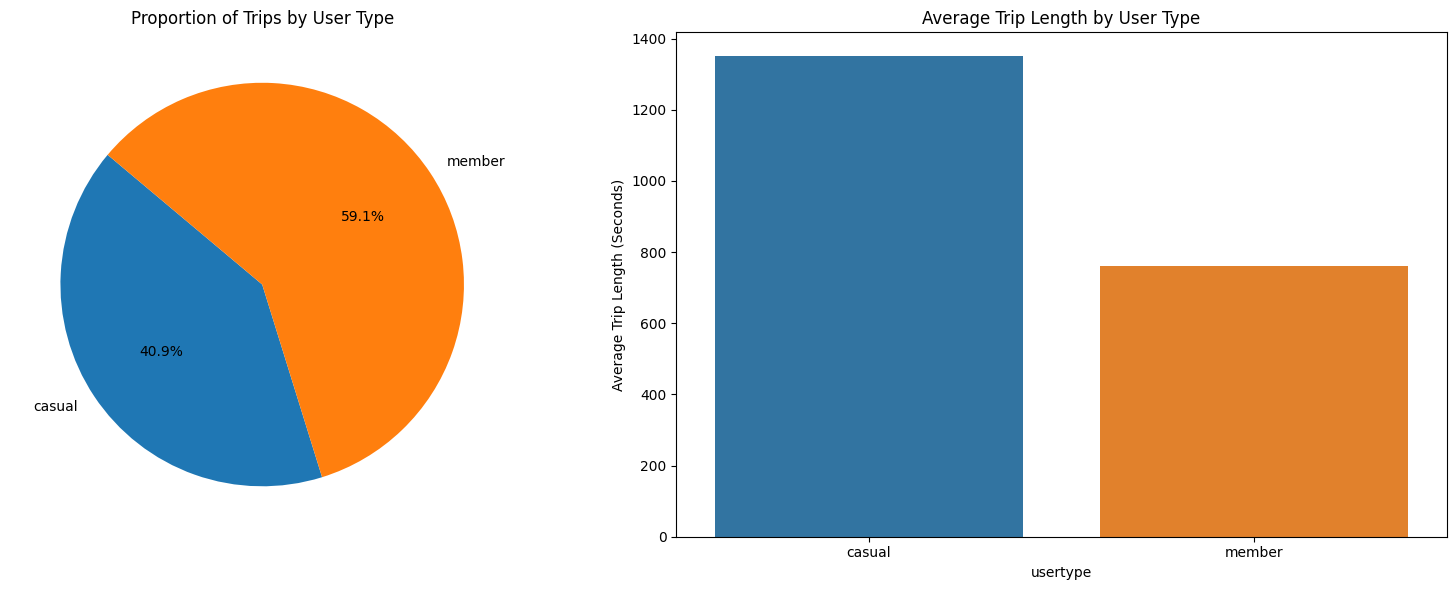

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(16, 6))

# First plot: Proportion of Trips by User Type
plt.subplot(1, 2, 1)
plt.pie(year_summary['number_of_trips'], labels=year_summary['usertype'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Trips by User Type')

# Second plot: Average Trip Length by User Type
plt.subplot(1, 2, 2)
sns.barplot(x='usertype', y='average_trip_length', data=year_summary)
plt.title('Average Trip Length by User Type')
plt.ylabel('Average Trip Length (Seconds)')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Group by user type and summarize ride length
ride_length_summary = all_trips.groupby('usertype')['ride_length'].agg(['mean', 'median', 'max', 'min']).reset_index()
print(ride_length_summary)


  usertype         mean  median        max   min
0   casual  1350.093054   799.0  1922127.0  61.0
1   member   760.595761   542.0    89996.0  61.0


In [ ]:
# Calculate quartiles and IQR for ride_length
quartiles = all_trips['ride_length'].quantile([0, 0.25, 0.5, 0.75, 1])
IQR = quartiles[0.75] - quartiles[0.5]
upper_edge = quartiles[0.75] + 1.5 * IQR

# Edges for bins
edges = [0, quartiles[0.25], quartiles[0.5], quartiles[0.75], upper_edge, quartiles[1]]

# Bin labels
labels = [f"{edges[i]} to {edges[i+1]}" for i in range(len(edges) - 1)]

# Binning and labeling ride_length
all_trips['ride_length_bin'] = pd.cut(all_trips['ride_length'], bins=edges, labels=labels, right=False)
print(all_trips['ride_length_bin'].value_counts())


632.0 to 1125.0        1401737
0 to 365.0             1400946
365.0 to 632.0         1400087
1125.0 to 1864.5        801631
1864.5 to 1922127.0     599643
Name: ride_length_bin, dtype: int64


In [ ]:
# Group by usertype and ride_length_bin
ride_length_counts = all_trips.groupby(['usertype', 'ride_length_bin']).size().reset_index(name='count')
ride_length_counts['percentage'] = ride_length_counts.groupby('usertype')['count'].apply(lambda x: x / x.sum() * 100)
print(ride_length_counts)


  usertype      ride_length_bin    count  percentage
0   casual           0 to 365.0   381579   16.645110
1   casual       365.0 to 632.0   510164   22.254202
2   casual      632.0 to 1125.0   599772   26.163052
3   casual     1125.0 to 1864.5   395753   17.263404
4   casual  1864.5 to 1922127.0   405171   17.674233
5   member           0 to 365.0  1019367   30.781660
6   member       365.0 to 632.0   889923   26.872861
7   member      632.0 to 1125.0   801965   24.216807
8   member     1125.0 to 1864.5   405878   12.256232
9   member  1864.5 to 1922127.0   194472    5.872439


<ipython-input-66-880d943b21e6>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ride_length_counts['percentage'] = ride_length_counts.groupby('usertype')['count'].apply(lambda x: x / x.sum() * 100)


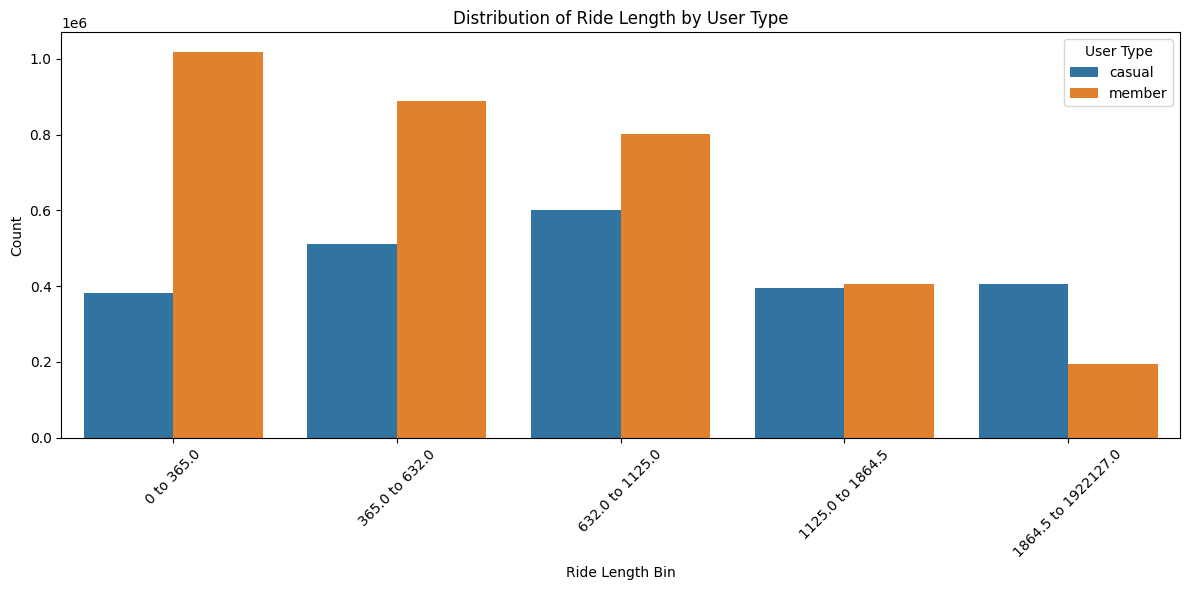

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(12, 6))

# Plotting
sns.barplot(data=ride_length_counts, x='ride_length_bin', y='count', hue='usertype', dodge=True)
plt.title('Distribution of Ride Length by User Type')
plt.xlabel('Ride Length Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='User Type')

# Display the plot
plt.tight_layout()
plt.show()


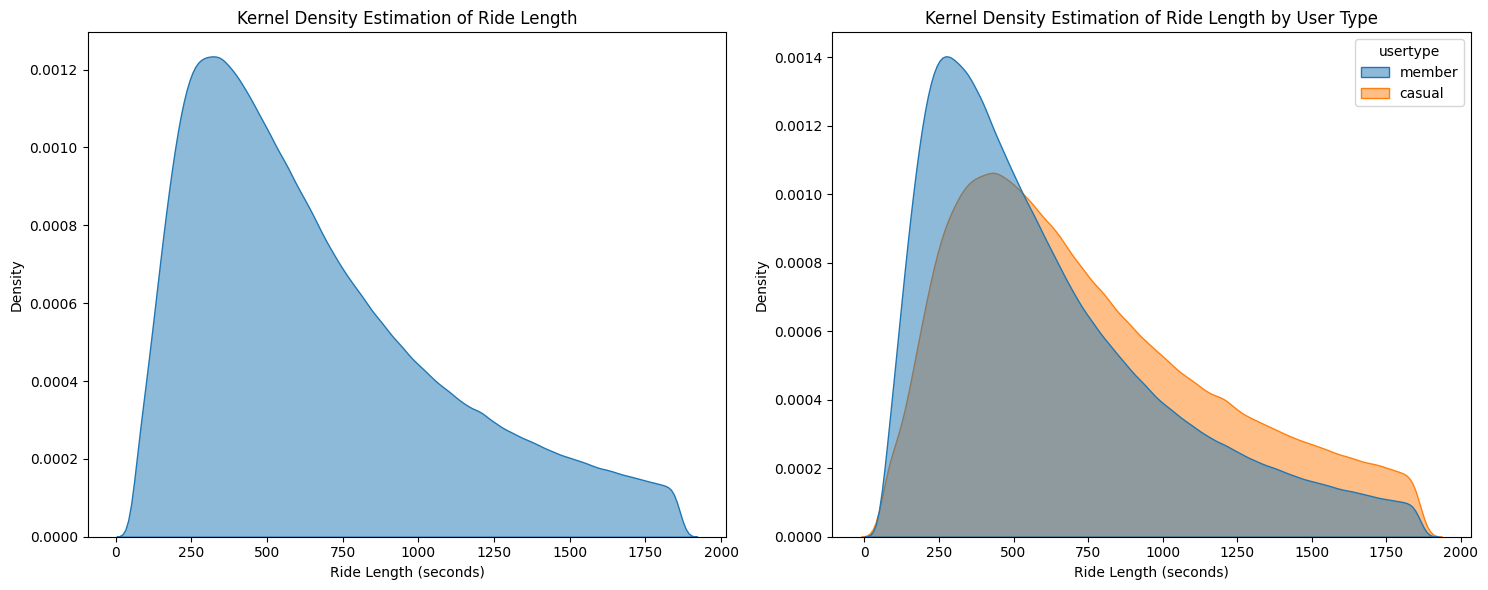

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(15, 6))

# Plot1: Kernel Density Estimation of Ride Length
plt.subplot(1, 2, 1)
sns.kdeplot(all_trips[all_trips['ride_length'] <= upper_edge]['ride_length'], fill="blue", alpha=0.5)
plt.title('Kernel Density Estimation of Ride Length')
plt.xlabel('Ride Length (seconds)')
plt.ylabel('Density')

# Plot2: KDE of Ride Length by User Type
plt.subplot(1, 2, 2)
sns.kdeplot(data=all_trips[all_trips['ride_length'] <= upper_edge], x='ride_length', hue='usertype', common_norm=False, fill=True, alpha=0.5)
plt.title('Kernel Density Estimation of Ride Length by User Type')
plt.xlabel('Ride Length (seconds)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


## Geospatial Analysis

In [ ]:
# Group by rounded start coordinates and count
rounded_start_coords = all_trips.groupby(['rounded_start_lat', 'rounded_start_lng']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Display the first three rows
print(rounded_start_coords.head(3))


     rounded_start_lat  rounded_start_lng   count
380              41.88             -87.64  223004
399              41.89             -87.63  212050
418              41.90             -87.63  184199


In [ ]:
# Assuming rounded_start_coords is a DataFrame with a 'count' column

# Calculate quantiles
start_counts_quantiles = rounded_start_coords['count'].quantile([0, 0.25, 0.5, 0.75, 1])

# Calculate IQR
coords_counts_IQR = start_counts_quantiles[0.75] - start_counts_quantiles[0.5]

# Calculate upper edge
coords_counts_upper_edge = start_counts_quantiles[0.75] + coords_counts_IQR * 1.5

# Print median (50th percentile) and upper edge
print(f"start_counts_quantiles[3]= {start_counts_quantiles[0.5]}")
print(f"coords_counts_upper_edge= {coords_counts_upper_edge}")


start_counts_quantiles[3]= 544.5
coords_counts_upper_edge= 6629.5


In [ ]:
import folium

# Function to add CircleMarkers to the map
def add_circle_markers(data, map_object, edge_color):
    for _, row in data.iterrows():
        folium.CircleMarker(
            location=[row['rounded_start_lat'], row['rounded_start_lng']],
            radius=row['count'] * 0.00005,
            color=edge_color,
            fill=True,
            fill_opacity=0.7
        ).add_to(map_object)

# Create a folium map
map_width, map_height = 800, 900
map_object = folium.Map(location=[41.86, -87.6298], zoom_start=11, width=map_width, height=map_height)

# Adding CircleMarkers for different count ranges
# You can modify the filtering conditions as per your requirements
add_circle_markers(rounded_start_coords[rounded_start_coords['count'] > coords_counts_upper_edge], map_object, 'blue')
add_circle_markers(rounded_start_coords[(rounded_start_coords['count'] > start_counts_quantiles[0.5]) & (rounded_start_coords['count'] <= coords_counts_upper_edge)], map_object, 'red')
add_circle_markers(rounded_start_coords[rounded_start_coords['count'] <= start_counts_quantiles[0.5]], map_object, 'green')

# Display the map
map_object


In [ ]:
# Group by rounded start coordinates and user type, then count
data = all_trips.groupby(['rounded_start_lat', 'rounded_start_lng', 'usertype']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Separate data for 'member' and 'casual' users
member_data = data[data['usertype'] == 'member']
casual_data = data[data['usertype'] == 'casual']

# Function to add CircleMarkers for a specific user type
def add_circle_markers(data, map_object, edge_color, offset=0):
    for _, row in data.iterrows():
        folium.CircleMarker(
            location=[row['rounded_start_lat'], row['rounded_start_lng'] + offset],
            radius=row['count'] * 0.0002,  # Adjust the scaling factor as needed
            color=edge_color,
            fill=True,
            fill_opacity=0.7,
            popup=f"{row['usertype'].capitalize()} Count: {row['count']}"
        ).add_to(map_object)

# Create a folium map centered on a specific location
map_object = folium.Map(location=[41.86, -87.6298], zoom_start=12, width=800, height=800)

# Adding CircleMarkers for member and casual user data
add_circle_markers(member_data.head(10), map_object, 'blue', offset=-0.0001)  # Offset for visual clarity
add_circle_markers(casual_data.head(10), map_object, 'red', offset=0.0001)   # Offset for visual clarity

# Adding a legend manually (folium doesn't support automatic legends for CircleMarkers)
legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 80px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>User Type:</b> <br>
     &nbsp; <i style="background:blue"></i> Member &nbsp; <i style="background:red"></i> Casual
     </div>
     '''
map_object.get_root().html.add_child(folium.Element(legend_html))

# Display the map
map_object



In [ ]:
# Group by usertype and calculate mean coordinates
mean_coords = all_trips.groupby('usertype')['start_lat', 'start_lng'].mean().reset_index()

# Create a folium map
center_map = folium.Map(location=[41.89, -87.75], zoom_start=10, width=500, height=600)

# Adding markers
for _, row in mean_coords.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=5,  # You can adjust the radius based on the count or other criteria
        color='blue' if row['usertype'] == 'member' else 'red',
        fill=True,
        fill_opacity=0.7
    ).add_to(center_map)

# Display the map
center_map


<ipython-input-77-152a8d8b847f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_coords = all_trips.groupby('usertype')['start_lat', 'start_lng'].mean().reset_index()


## Rideable Type

In [ ]:

# Group by usertype and rideable_type, then calculate count
rides_by_rideable_type = all_trips.groupby(['usertype', 'rideable_type']).size().reset_index(name='count')

# Calculate percentage of each group
total_counts = rides_by_rideable_type.groupby('usertype')['count'].transform('sum')
rides_by_rideable_type['percentage'] = (rides_by_rideable_type['count'] / total_counts) * 100

print(rides_by_rideable_type)


  usertype  rideable_type    count  percentage
0   casual   classic_bike  1059426   46.213903
1   casual  electric_bike  1233014   53.786097
2   member   classic_bike  1702950   51.423705
3   member  electric_bike  1608655   48.576295


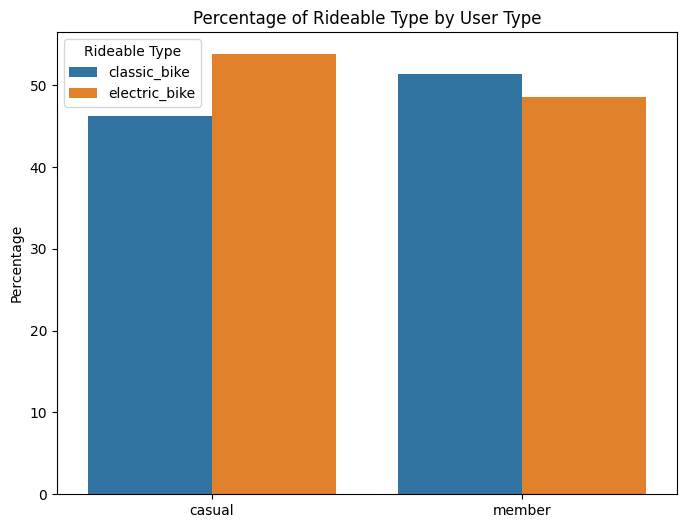

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(8, 6))

# Plotting
sns.barplot(data=rides_by_rideable_type, x='usertype', y='percentage', hue='rideable_type')
plt.title('Percentage of Rideable Type by User Type')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title='Rideable Type')

plt.show()


In [ ]:
# Assuming all_trips is your DataFrame and it contains the necessary columns
data = all_trips.groupby(['usertype', 'rideable_type', 'rounded_start_lat', 'rounded_start_lng']).size().reset_index(name='count')

import folium

# Create a folium map
rideables_map = folium.Map(location=[41.89, -87.63], zoom_start=10, width=800, height=800)

# Function to add CircleMarkers for a specific rideable type
def add_circle_markers_by_rideable_type(data, rideable_type, color):
    filtered_data = data[data['rideable_type'] == rideable_type]
    for _, row in filtered_data.iterrows():
        folium.CircleMarker(
            location=[row['rounded_start_lat'], row['rounded_start_lng']],
            radius=row['count'] * 0.0001,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=str(row['count'])
        ).add_to(rideables_map)

# Adding markers for each rideable type
add_circle_markers_by_rideable_type(data, 'classic_bike', 'red')
add_circle_markers_by_rideable_type(data, 'electric_bike', 'green')

# Adding a legend
legend_html = '''
     <div style="position: fixed;
     bottom: 50px; right: 50px; width: 150px; height: 60px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Rideable Types:</b> <br>
     &nbsp; <i style="background:red"></i> Classic Bike &nbsp; <i style="background:green"></i> Electric Bike
     </div>
     '''
rideables_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
rideables_map


In [ ]:
# Group by coordinates and count electric bike rides
data2 = all_trips[all_trips['rideable_type'] == 'electric_bike'].groupby(['rounded_start_lat', 'rounded_start_lng']).size().reset_index(name='electric_bike_count').sort_values(by='electric_bike_count', ascending=False)

print(data2.head(3))


     rounded_start_lat  rounded_start_lng  electric_bike_count
380              41.88             -87.64               105128
399              41.89             -87.63                98515
418              41.90             -87.63                82604


In [ ]:
# Create a map for only electric bikes
only_electric_bike_map = folium.Map(location=[41.89, -87.63], zoom_start=11, width=800, height=800)

for _, row in data2.iterrows():
    folium.CircleMarker(
        location=[row['rounded_start_lat'], row['rounded_start_lng']],
        radius=row['electric_bike_count'] * 0.001,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=str(row['electric_bike_count'])
    ).add_to(only_electric_bike_map)

only_electric_bike_map


In [ ]:
# Group by rounded_start_lat and rounded_start_lng
data3 = all_trips.groupby(['rounded_start_lat', 'rounded_start_lng']).agg(
    member_count=pd.NamedAgg(column='usertype', aggfunc=lambda x: (x == 'member').sum()),
    casual_count=pd.NamedAgg(column='usertype', aggfunc=lambda x: (x == 'casual').sum()),
    classic_bike_count=pd.NamedAgg(column='rideable_type', aggfunc=lambda x: (x == 'classic_bike').sum()),
    electric_bike_count=pd.NamedAgg(column='rideable_type', aggfunc=lambda x: (x == 'electric_bike').sum())
).reset_index()

# Filter out rows where classic_bike_count is not zero and sort by electric_bike_count
data3 = data3[data3['classic_bike_count'] == 0].sort_values(by='electric_bike_count', ascending=False)

# Display the first three rows
print(data3.head(3))


     rounded_start_lat  rounded_start_lng  member_count  casual_count  \
213              41.78             -87.60          5043          1215   
473              41.93             -87.69          3066          2836   
450              41.92             -87.72          3173          2622   

     classic_bike_count  electric_bike_count  
213                   0                 6258  
473                   0                 5902  
450                   0                 5795  


In [ ]:
# Calculate total member and casual counts
total_member_count = data3['member_count'].sum()
total_casual_count = data3['casual_count'].sum()

# Print total counts
print(f"total_member_count= {total_member_count}")
print(f"total_casual_count= {total_casual_count}")


total_member_count= 69450
total_casual_count= 79175


## Distance between start and end stations

In [ ]:
# Group by usertype and calculate statistics for start_end_distance_meter
distance_summary = all_trips.groupby('usertype')['start_end_distance_meter'].agg(['median', 'mean', 'max', 'min']).reset_index()
print(distance_summary)


  usertype       median         mean           max  min
0   casual  1691.399968  2223.519048  36533.591469  0.0
1   member  1544.028381  2139.633238  42369.044045  0.0


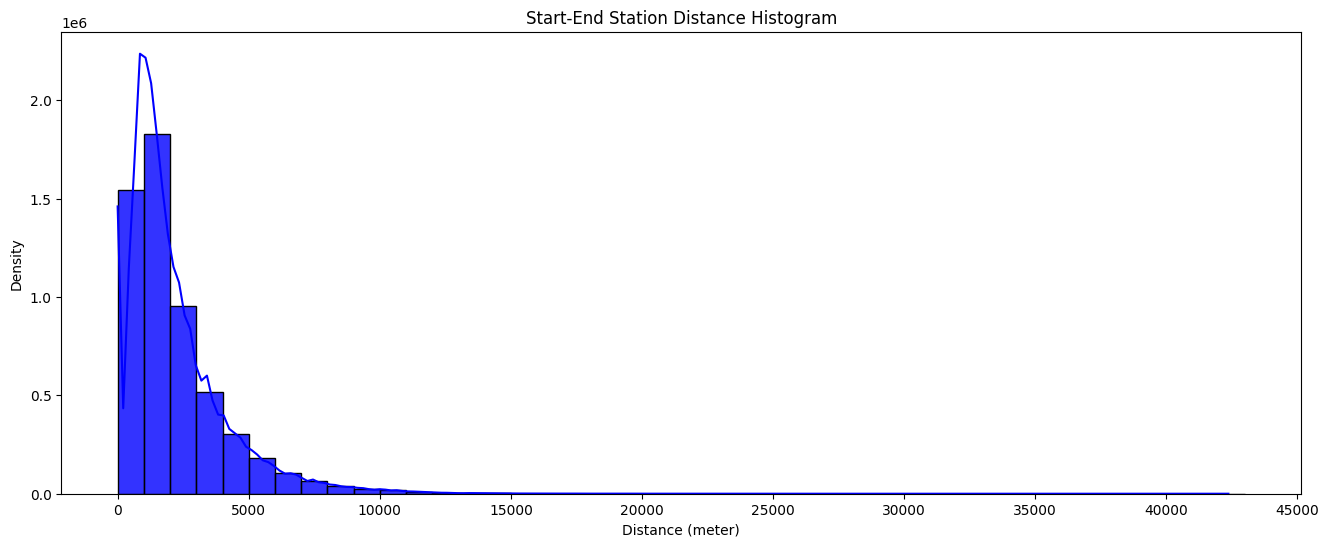

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Histogram and density plot
sns.histplot(all_trips['start_end_distance_meter'], binwidth=1000, kde=True, color="blue", alpha=0.8)
plt.title('Start-End Station Distance Histogram')
plt.xlabel('Distance (meter)')
plt.ylabel('Density')
plt.xticks(range(0, int(all_trips['start_end_distance_meter'].max()) + 5000, 5000))

plt.show()


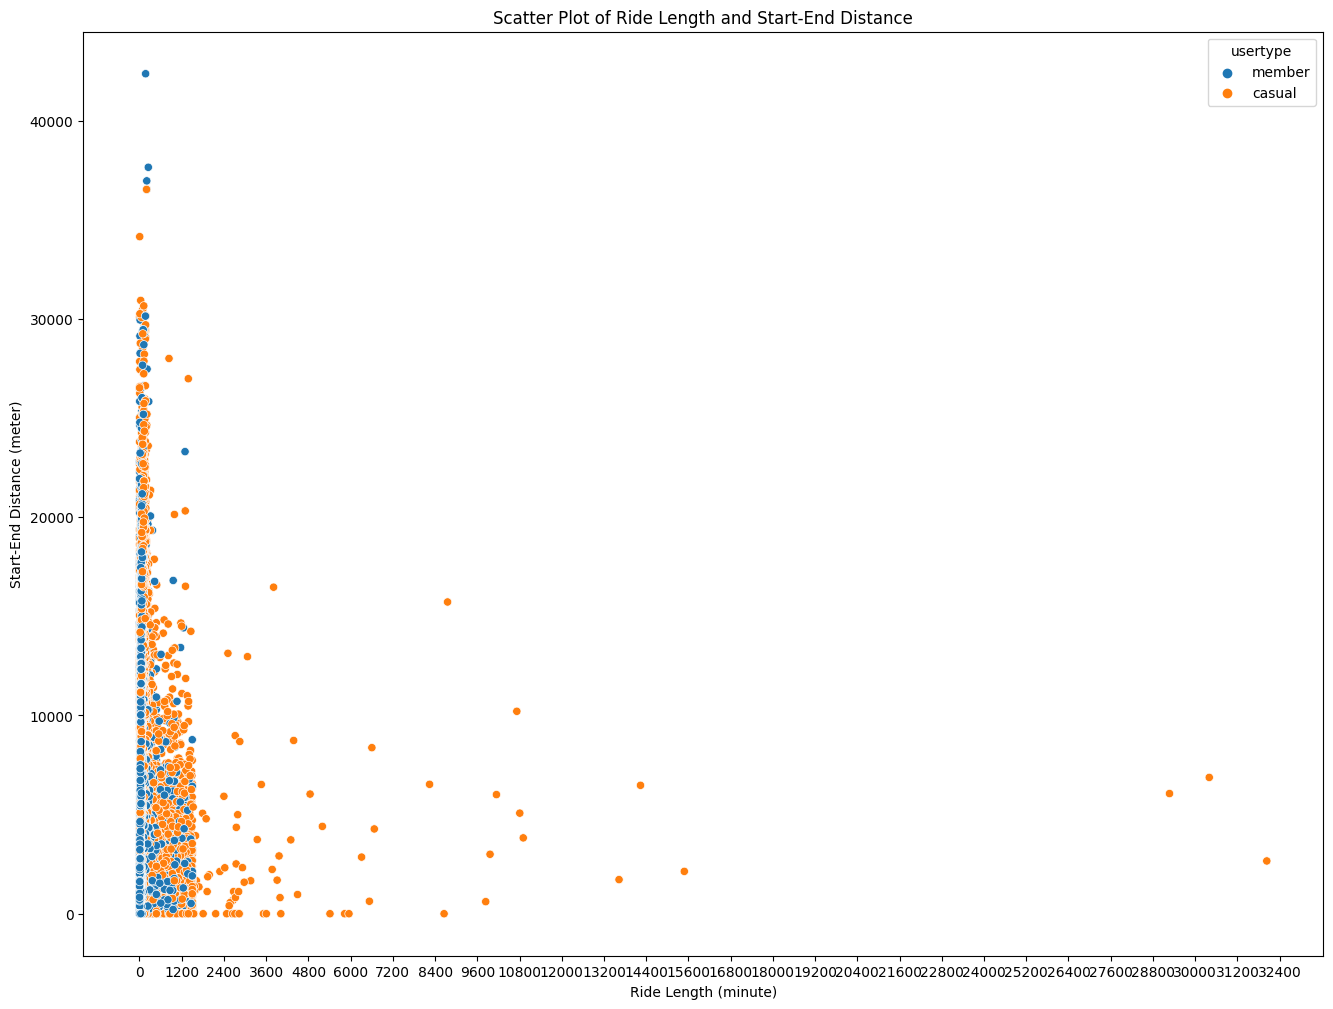

In [ ]:
plt.figure(figsize=(16, 12))

# Scatter plot
sns.scatterplot(data=all_trips, x='ride_length_minute', y='start_end_distance_meter', hue='usertype')
plt.title('Scatter Plot of Ride Length and Start-End Distance')
plt.xlabel('Ride Length (minute)')
plt.ylabel('Start-End Distance (meter)')
plt.xticks(range(0, int(all_trips['ride_length_minute'].max()) + 1200, 1200))

plt.show()


In [ ]:
# Count number of rides with ride_length_minute > 1500
long_rides_count = len(all_trips[all_trips['ride_length_minute'] > 1500])
print(f"Number of rides with ride_length_minute > 1500: {long_rides_count}")

# Count number of rides with start_end_distance_meter > 18000
long_distance_count = len(all_trips[all_trips['start_end_distance_meter'] > 18000])
print(f"Number of rides with start_end_distance_meter > 18000: {long_distance_count}")


Number of rides with ride_length_minute > 1500: 81
Number of rides with start_end_distance_meter > 18000: 1314


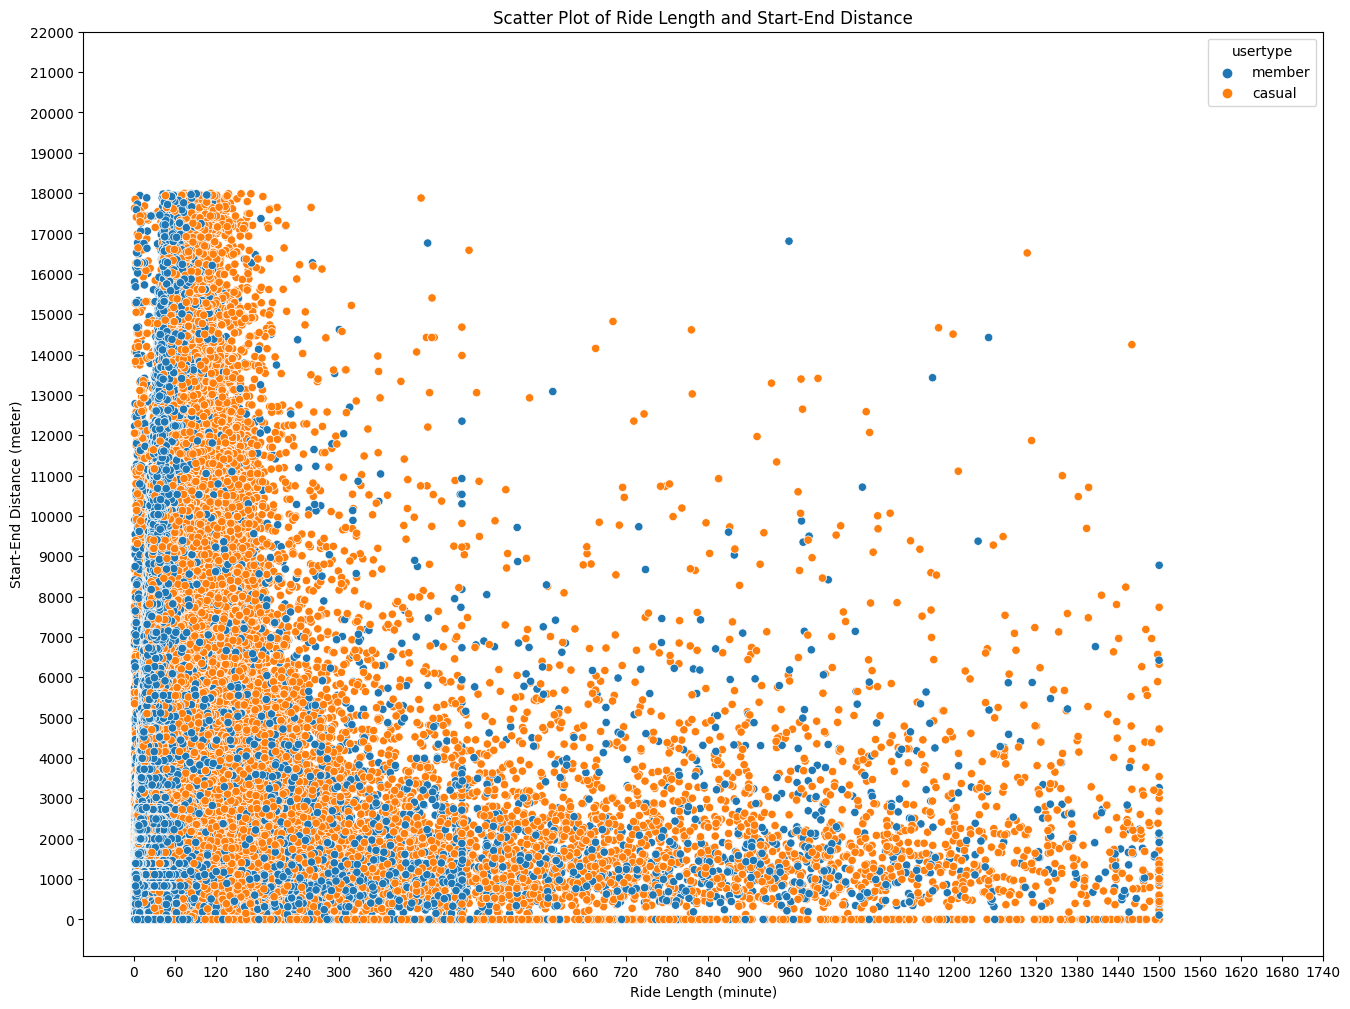

In [ ]:
filtered_data = all_trips[(all_trips['start_end_distance_meter'] <= 18000) & (all_trips['ride_length_minute'] <= 1500)]

plt.figure(figsize=(16, 12))
sns.scatterplot(data=filtered_data, x='ride_length_minute', y='start_end_distance_meter', hue='usertype')
plt.title('Scatter Plot of Ride Length and Start-End Distance')
plt.xlabel('Ride Length (minute)')
plt.ylabel('Start-End Distance (meter)')
plt.xticks(range(0, 1800, 60))
plt.yticks(range(0, 23000, 1000))

plt.show()


## Back to same station

In [ ]:

# Group by usertype and back_to_same_station and calculate counts and percentages
back_to_same_station_counts = all_trips.groupby(['usertype', 'back_to_same_station']).size().reset_index(name='count')
total_counts = back_to_same_station_counts.groupby('usertype')['count'].transform('sum')
back_to_same_station_counts['percentage'] = (back_to_same_station_counts['count'] / total_counts) * 100

print(back_to_same_station_counts)


  usertype  back_to_same_station    count  percentage
0   casual                 False  2103577   91.761486
1   casual                  True   188863    8.238514
2   member                 False  3190880   96.354487
3   member                  True   120725    3.645513


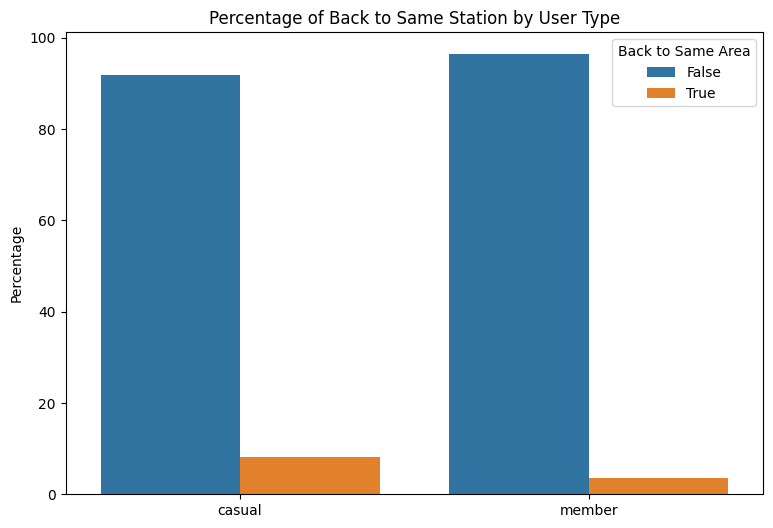

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Stacked bar plot
sns.barplot(data=back_to_same_station_counts, x='usertype', y='percentage', hue='back_to_same_station')
plt.title('Percentage of Back to Same Station by User Type')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title='Back to Same Area')

plt.show()


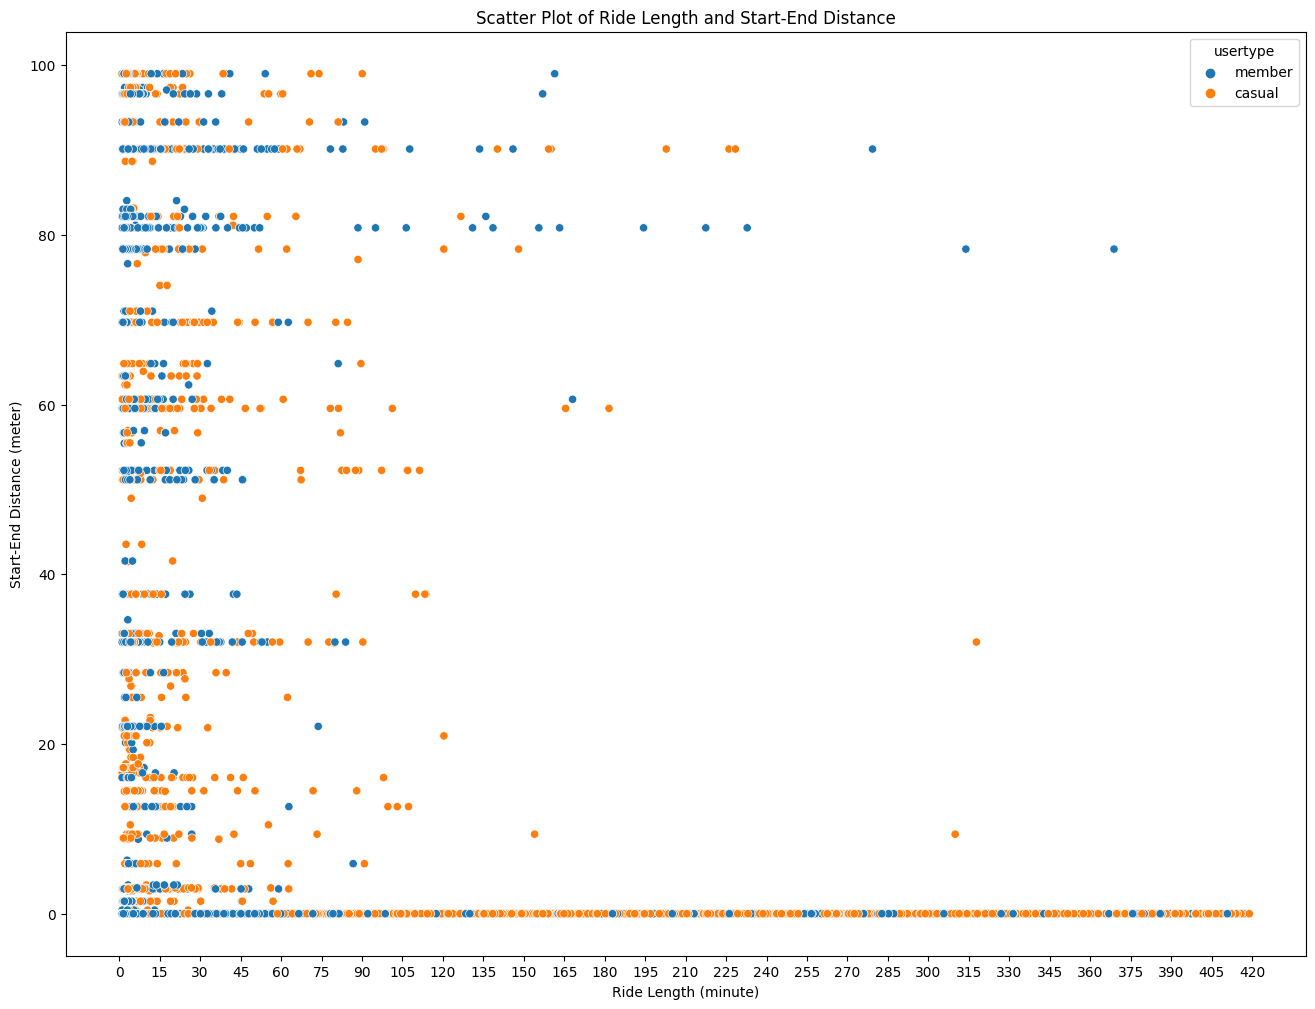

In [ ]:
# Filtering data
filtered_data = all_trips[(all_trips['start_end_distance_meter'] <= 100) & (all_trips['ride_length_minute'] <= 420)]

plt.figure(figsize=(16, 12))

# Scatter plot
sns.scatterplot(data=filtered_data, x='ride_length_minute', y='start_end_distance_meter', hue='usertype')
plt.title('Scatter Plot of Ride Length and Start-End Distance')
plt.xlabel('Ride Length (minute)')
plt.ylabel('Start-End Distance (meter)')
plt.xticks(range(0, 421, 15))

plt.show()


# By Month

In [ ]:
# Group by usertype and month, then calculate count and average
rides_by_month = all_trips.groupby(['usertype', 'month']).agg(
    count=pd.NamedAgg(column='ride_length', aggfunc='size'),
    average=pd.NamedAgg(column='ride_length', aggfunc='mean')
).reset_index()

# Display the first three rows
print(rides_by_month.head(3))


  usertype month  count      average
0   casual    01  18087  1335.161884
1   casual    02  20899  1350.893344
2   casual    03  88025  1524.303175


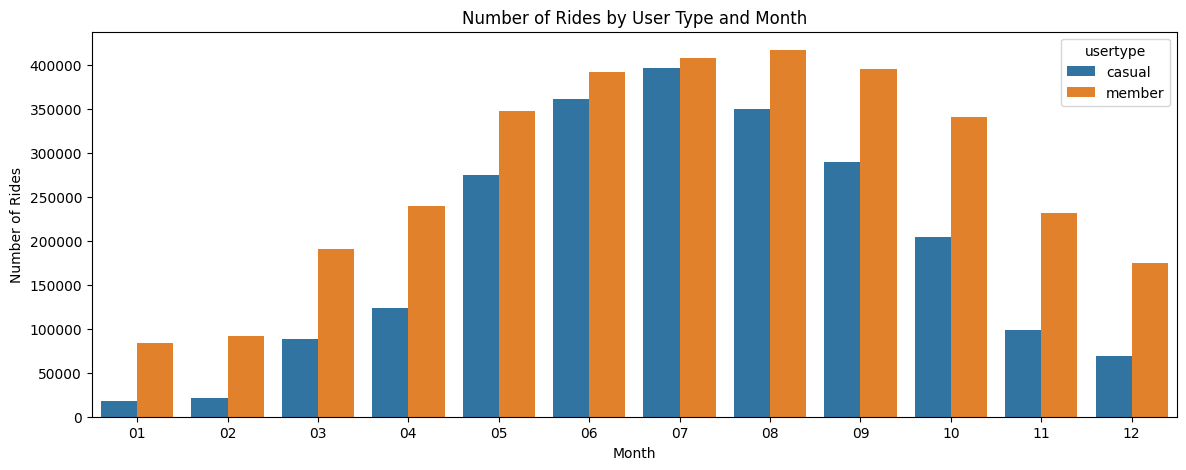

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Bar chart for count of rides
sns.barplot(data=rides_by_month, x='month', y='count', hue='usertype', dodge=True)
plt.title('Number of Rides by User Type and Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')

plt.show()


In [ ]:
# Minimum and maximum average ride lengths for members
member_averages = rides_by_month[rides_by_month['usertype'] == 'member']['average']
min_member_avg = member_averages.min() / 60
max_member_avg = member_averages.max() / 60

# Minimum and maximum average ride lengths for casual users
casual_averages = rides_by_month[rides_by_month['usertype'] == 'casual']['average']
min_casual_avg = casual_averages.min() / 60
max_casual_avg = casual_averages.max() / 60

# Print the values
print(f"Member - Min Avg Ride Length: {min_member_avg} minutes, Max Avg Ride Length: {max_member_avg} minutes")
print(f"Casual - Min Avg Ride Length: {min_casual_avg} minutes, Max Avg Ride Length: {max_casual_avg} minutes")


Member - Min Avg Ride Length: 11.013583079220325 minutes, Max Avg Ride Length: 13.93272332445475 minutes
Casual - Min Avg Ride Length: 15.840878686943796 minutes, Max Avg Ride Length: 26.01666976500049 minutes


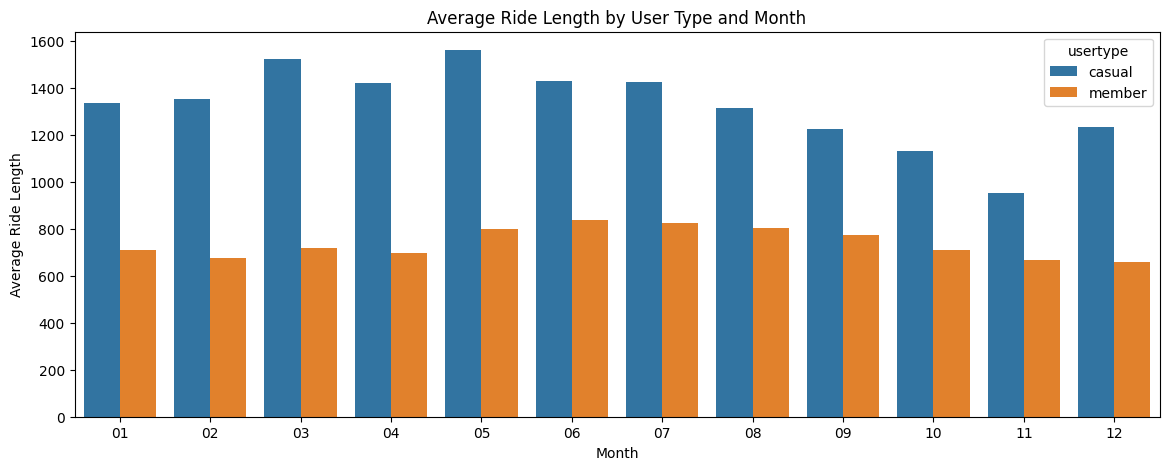

In [ ]:
plt.figure(figsize=(14, 5))

# Bar chart for average ride length
sns.barplot(data=rides_by_month, x='month', y='average', hue='usertype', dodge=True)
plt.title('Average Ride Length by User Type and Month')
plt.xlabel('Month')
plt.ylabel('Average Ride Length')

plt.show()


#By Day of the Week

In [ ]:
# Ensure 'day_of_week' is a categorical variable with ordered days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
all_trips['day_of_week'] = pd.Categorical(all_trips['day_of_week'], categories=day_order, ordered=True)

# Group by usertype and day_of_week, then calculate count and average
rides_by_day = all_trips.groupby(['usertype', 'day_of_week']).agg(
    count=pd.NamedAgg(column='ride_length', aggfunc='size'),
    average=pd.NamedAgg(column='ride_length', aggfunc='mean')
).reset_index()

print(rides_by_day.head(3))


  usertype day_of_week   count      average
0   casual      Monday  274021  1389.232825
1   casual     Tuesday  257913  1214.420557
2   casual   Wednesday  273060  1171.421296


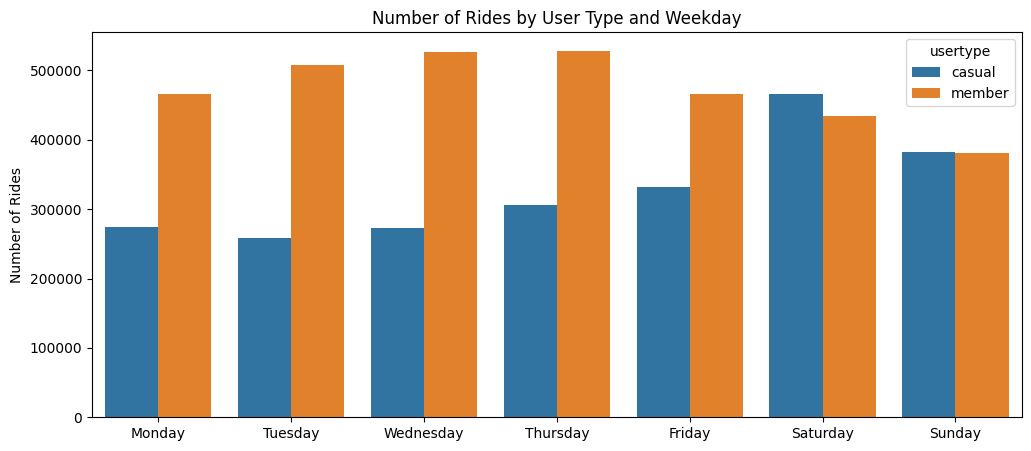

In [ ]:
plt.figure(figsize=(12, 5))

# Bar chart for count of rides
sns.barplot(data=rides_by_day, x='day_of_week', y='count', hue='usertype', dodge=True)
plt.title('Number of Rides by User Type and Weekday')
plt.xlabel('')
plt.ylabel('Number of Rides')

plt.show()


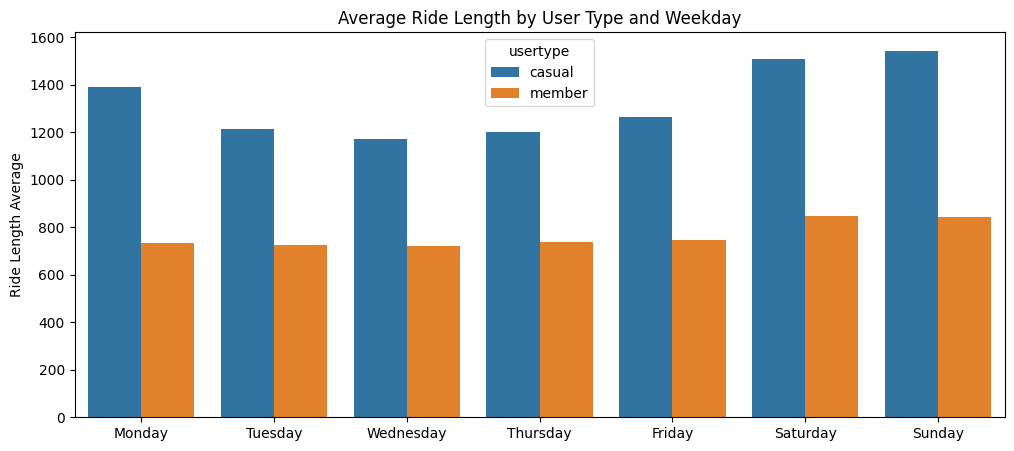

In [ ]:
plt.figure(figsize=(12, 5))

# Bar chart for average ride length
sns.barplot(data=rides_by_day, x='day_of_week', y='average', hue='usertype', dodge=True)
plt.title('Average Ride Length by User Type and Weekday')
plt.xlabel('')
plt.ylabel('Ride Length Average')

plt.show()


#By Hour

In [ ]:
# Group by usertype and hour, then calculate count and average
rides_by_hour = all_trips.groupby(['usertype', 'hour']).agg(
    count=pd.NamedAgg(column='ride_length', aggfunc='size'),
    average=pd.NamedAgg(column='ride_length', aggfunc='mean')
).reset_index()

print(rides_by_hour.head(3))


  usertype hour  count      average
0   casual   00  45591  1173.304139
1   casual   01  29616  1292.332624
2   casual   02  18431  1265.180023


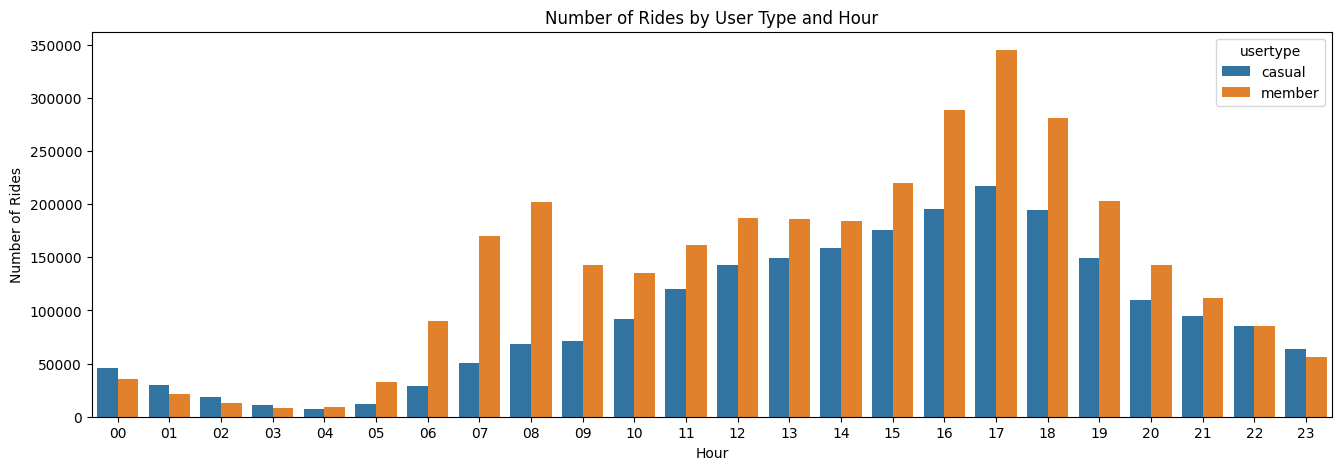

In [ ]:
plt.figure(figsize=(16, 5))

# Bar chart for count of rides
sns.barplot(data=rides_by_hour, x='hour', y='count', hue='usertype', dodge=True)
plt.title('Number of Rides by User Type and Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')

plt.show()


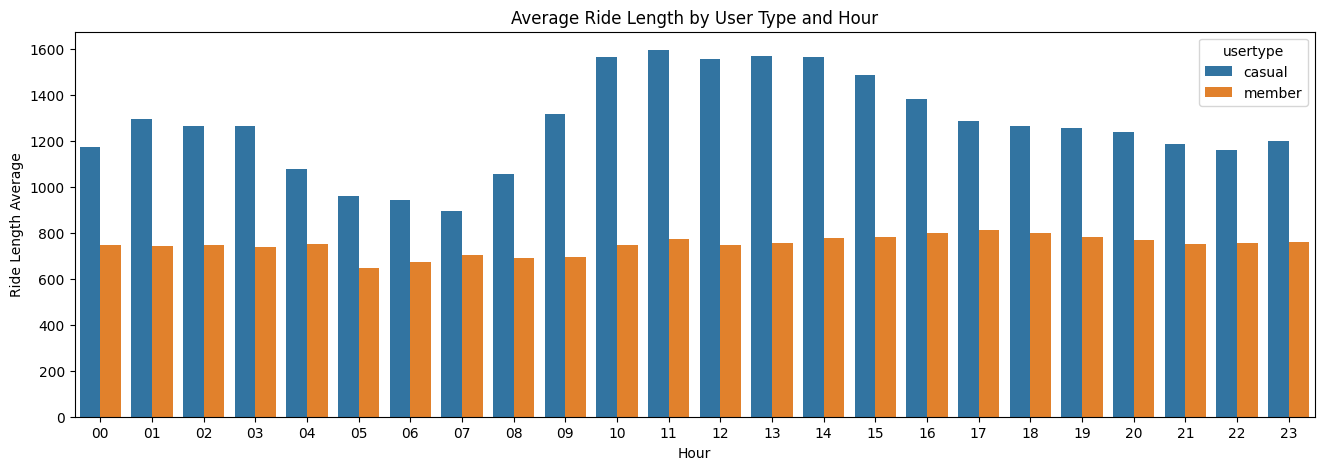

In [ ]:
plt.figure(figsize=(16, 5))

# Bar chart for average ride length
sns.barplot(data=rides_by_hour, x='hour', y='average', hue='usertype', dodge=True)
plt.title('Average Ride Length by User Type and Hour')
plt.xlabel('Hour')
plt.ylabel('Ride Length Average')

plt.show()
